# Group 29 Coursework
<hr style="border: 2px solid black;">
 
Module Code: CS2PP22

Assignment report Title: Studying trends of FTSE 100 Index from 2009 - 2023

Date (when the work completed): 11/03/2024 

Actual hrs spent for the assignment: 13 hours per person

In [1]:
# All import statements

# Packages Explored in Module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# New Tool for This Project
# The tensorflow package is already installed and didn't require additional downloads
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Individually written tools from module files
from StockPlotter_FR import StockPlotter_FR
from TrainTest_CO import TrainTest_CO
from HeatmapEvaluation_CSB import HeatmapEvaluation_CSB
from ScatterPlotEvaluation_TAA import ScatterPlotEvaluation_TAA

## 1. Frame the Problem
---
### Studying trends of FTSE 100 Index from 2009 - 2023
---
The **Financial Times Stock Exchange 100 Index (FTSE 100 Index)** is a stock market index of 100 of the most highly capitalised blue chip companies listed on the London Stock Exchange[1]. The FTSE 100 dataset {https://www.wsj.com/market-data/quotes/index/UK/UKX/historical-prices#} used records the following data: 

| Columns | Data Represented |
|---------|------------------|
| Date | Date of the stock market activity observed |
| Open Price | Average price at which the first trade of the day occurred when the market opened|
| Close Price | Average price at which the last trade of the day occurred when the market closed|
| Low Price | Average price at which the lowest trade of the day occurred|
| High Price | Average price at which the highest trade of the day occurred|
| Volume |Total number of share traded |

#### **Problem** 
We will be analyzing the effects that certain factors and world events have on a stocks prices of the FTSE 100 Index.

[1]: https://en.wikipedia.org/wiki/FTSE_100_Index 


## 2. Collect Data
---
The dataset was obtained from the Wall Street Journal's website as a csv file. The following codes reads the data from the csv file into a pandas Dataframe and assigns the Date column as the index for the dataframe.

In [2]:
# Code to read in data from a csv file into a dataframe
df = pd.read_csv("./data/initialStocksData.csv", index_col = 'Date')
df

Open Price  Close Price  High Price  Low Price      Volume
Date                                                                   
02-Jan-2009     4434.20      4561.80     4561.80    4430.00   407295392
05-Jan-2009     4561.80      4579.60     4618.10    4520.80   836675968
06-Jan-2009     4579.60      4638.90     4675.70    4562.00  1037315904
07-Jan-2009     4638.90      4507.50     4638.90    4478.00  1060111232
08-Jan-2009     4507.50      4505.40     4514.70    4410.50   924352384
...                 ...          ...         ...        ...         ...
19-Dec-2023     7614.48      7638.03     7642.15    7605.35   850517568
20-Dec-2023     7638.03      7715.68     7762.88    7637.93   715286592
21-Dec-2023     7715.68      7694.73     7715.68    7668.41   470206112
27-Dec-2023     7697.51      7724.95     7759.74    7697.51   353093216
28-Dec-2023     7724.95      7722.74     7745.99    7708.74   278925344

[3777 rows x 5 columns]

## 3. Exploratory Data Analysis
---
In the Exploratory Data Analysis (EDA) process, the data collected is analyzed and investigated using statistics and visualisations methods. The following sections are analyzing the FTSE 100 Index to determine ways to manipulate the data to make it easier to discover patterns, spot anomalies or test hypotesis[3].

[3]: https://www.ibm.com/topics/exploratory-data-analysis

In [3]:
# Size of the dataset
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe\n")

There are 3777 rows and 5 columns in the dataframe



In [4]:
# Checking if there are any null values in the dataframe
df.isnull().sum()

Open Price     0
Close Price    0
High Price     0
Low Price      0
Volume         0
dtype: int64

In [5]:
# A concise summary of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3777 entries, 02-Jan-2009 to 28-Dec-2023
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open Price   3777 non-null   float64
 1   Close Price  3777 non-null   float64
 2   High Price   3777 non-null   float64
 3   Low Price    3777 non-null   float64
 4   Volume       3777 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 177.0+ KB


In [6]:
# Statistics of the dataframes features
df.describe()

Open Price  Close Price   High Price    Low Price        Volume
count  3777.000000  3777.000000  3777.000000  3777.000000  3.777000e+03
mean   6521.888006  6526.687983  6562.169328  6481.182288  8.175834e+08
std     902.450296   890.186806   898.333281   907.158396  2.945792e+08
min       0.000000  3512.100000     0.000000     0.000000  0.000000e+00
25%    5891.960000  5892.750000  5927.930000  5858.480000  6.342239e+08
50%    6700.900000  6703.000000  6736.570000  6665.630000  7.631123e+08
75%    7279.420000  7281.190000  7313.700000  7241.990000  9.243524e+08
max    8014.310000  8014.310000  8047.060000  7995.460000  3.877630e+09

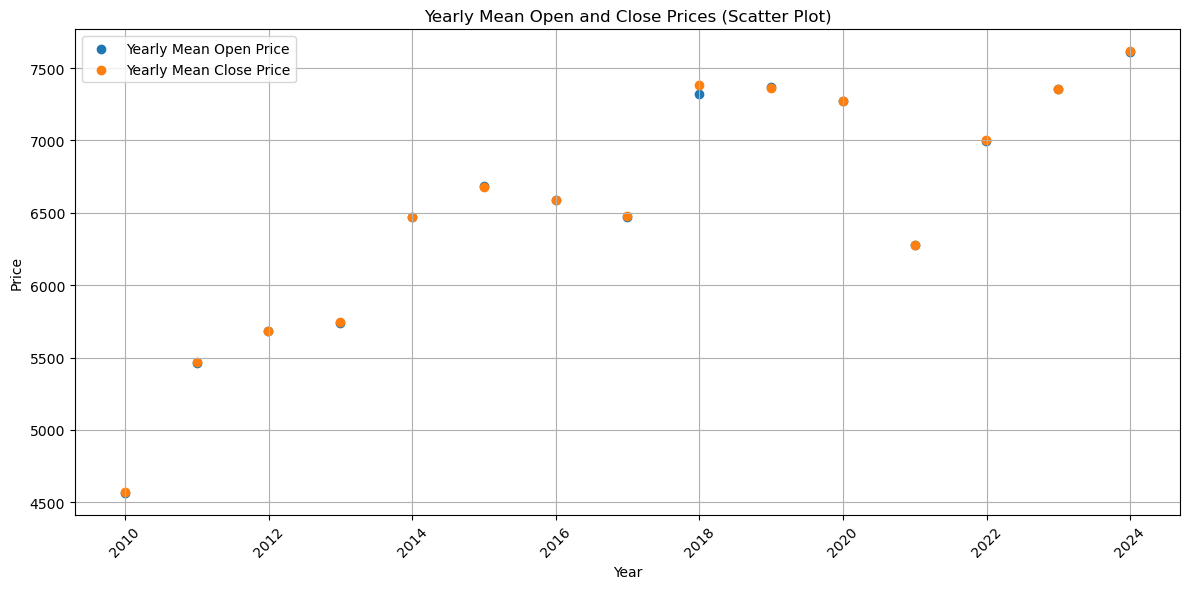

In [7]:
# Scatter plot of the yearly mean of the dataset (USING INDIVIDUAL MODULE CODE by Tina Azad Arjastan)
scatterplot_TAA = ScatterPlotEvaluation_TAA(df)
scatterplot_TAA.create_ScatterGraph()

**Description and discoveries:**

The relationship between the "open price" and "close price" of stocks over time is shown in a scatter plot. The x and y-coordinates of each point on the plot indicate the open and close prices, respectively, for a given date. The plot makes the relationship between the opening and closing prices for each day in the dataset easier to see.

**Trend Identification:**

We can determine any prevailing trends between the open and close prices by looking at the scatter plot. Whereas a negatively sloped trendline would suggest the opposite, indicating bearish behaviour, a positively sloped trendline would suggest that close prices tend to be higher than open prices, indicating bullish behaviour.

**Volatility Assessment:**

The degree of volatility in the stock prices can be inferred from the scatter plot's point spread or clustering. While a narrower spread might indicate lower volatility, a wider spread might indicate higher volatility.

**Finding Outliers:**

The scatter plot makes it simple to spot any anomalies or outliers in the data, such as closing prices that are abnormally high or low in comparison to their opening prices. Further research may be necessary to ascertain the cause and significance of these outliers.

**Pattern Recognition:**

Recurring market behaviours or trading patterns can be identified by traders and investors through patterns like clusters or shapes formed by the points on the scatter plot.
The scatter plot helps with the analysis of stock market trends, volatility, outliers, and patterns by providing a visual depiction of the relationship between open and close prices. This also shows the highs and lows of the covid cases.

From the scatter plot we can conclude:
1. There is a positive trend in the mean opening and closing prices over the past 15 years.
2. A large dip in the trend can be seen after the year 2020, this may be due to the impact of lockdown during the  COVID-19 pandemic.
3. However, the trend starts to improve after the end of 2021. This could be because businesses started operating again after the lockdown.

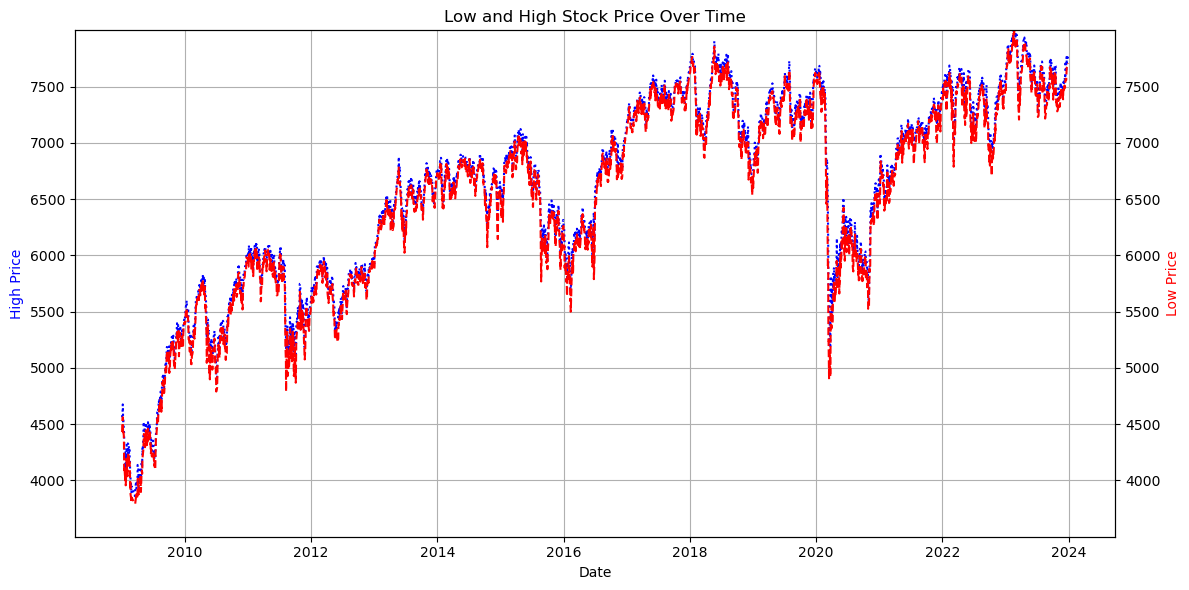

In [8]:
# Exploration Code (USING INDIVIDUAL MODULE CODE by Fabio Rodrigues)
plotter_FR = StockPlotter_FR(df)
plotter_FR.plot_low_price()
plotter_FR.plot_high_price()
plotter_FR.show()

**Line Graph**

**Description**

A line graph is a type of graph in which the individual data points are connected by lines. Quantitative values are shown on a line graph for a certain time period. We plotted a line chart over the years 2009 - 2023 for Uk’s top 100 companies' average high price and low price. We used line graphs to create visual representations of values over time.

**Discoveries** 

This graph shows the different highs and lows of the top 100 Uk’s companies' average high and low price. The graph starts in 2009 which shows an increase in both high and low prices after a decline due to the financial crisis in 2008-09. The prices have increased Significantly throughout the 2011 to 2015. There is a noticeable decline from 2015 to 2016 which also shows a clear gap between high and close prices which indicates uncertainty and increased unpredictability, potentially due to the impact of the UK leaving the EU. Early in 2020, there is a significant drop in both high and low stock values, which is likely due to the covid-19 pandemic which had widespread economic disruptions which are reflected in the stock prices. Both prices show signs of strong recovery after the pandemic , as they not only rebounded but also hit new highs. The graph displays a consistent period of rise from late 2020 to 2023, with the low price heading upward and the average high price frequently hitting new highs. This suggests that the economy is recovering. 



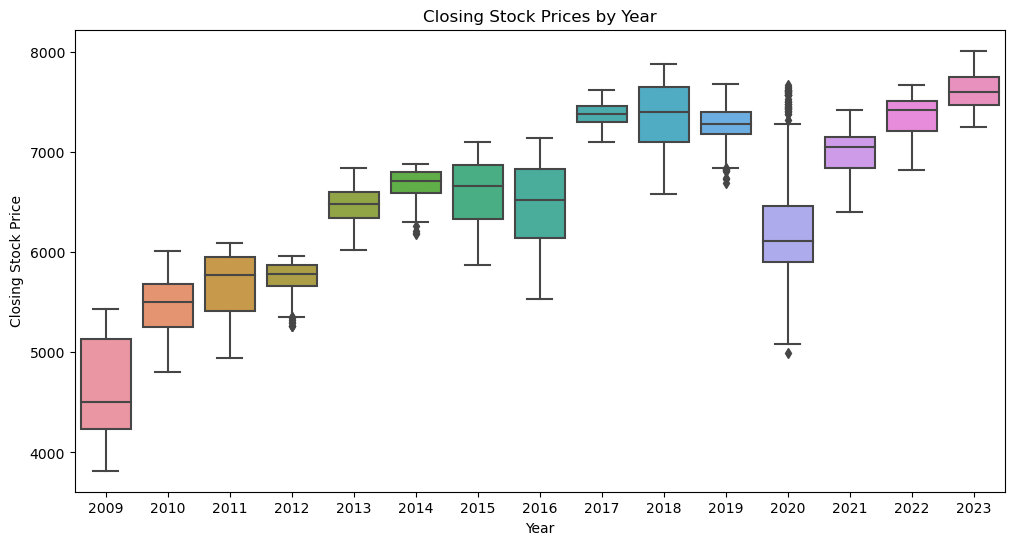

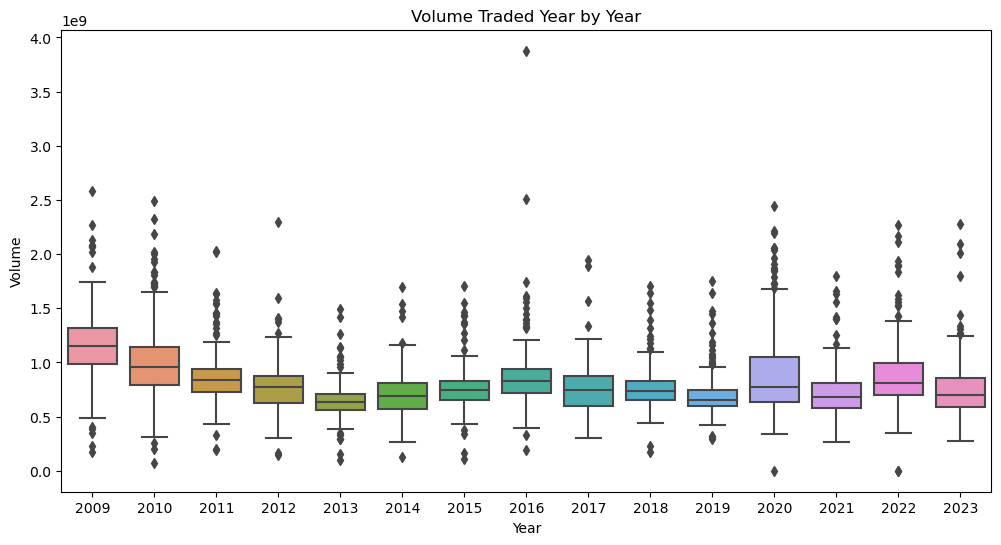

In [9]:
# Figures (USING INDIVIDUAL MODULE CODE by Fabio Rodrigues)
plotter_FR.plot_boxplot_by_year()
plotter_FR.plot_boxplot_for_Volume()

**Box plot**

**Descriptions**

The box plot is used to show a summary of data. It displays the distribution of data based on these five factors: minimum, first quartile, median, third quartile and maximum. It can also tell you about your outliers and their values, if your data is symmetrical, how tightly your data is grouped, and whether or not your data is skewed. I plotted the boxplot for close price and volume traded over the years 2009 - 2023. The data shows a box plot each year of those 
Years.

**Discoveries**

**Close** 

This box plot shows a clear increase after 2010, with the low median of around 4500 in 2009 which can be speculated to have been due to the Financial crisis of 2008-09. Then there has been a clear increase each year from 2010 to 2019 except for 2012, 2015, 2016 where the mean has either plateaued or had a small decline. The size of boxes in the years 2012, 2013,2014 and 2017 have smaller IQRs which suggests smaller variability in close price. But years such 2015,  2016 and 2018 have significantly bigger IQR’s which shows a higher variability in close prices. The 2020 box is much smaller and more scattered than the boxes for the years that surround it; which shows the impact of how the COVID-19 epidemic has affected the stock market. The 2020 box contains tons more outliers than other years. These outliers suggest that some businesses' closing prices differed noticeably from the average. After 2020, median prices recover, and the spread is more stable and variable in 2021 and 2022 than it was in years before to 2020, indicating a potential return to stability.

**Volume**

This box plot shows a consistent median throughout the years with no year. Having a significant amount of increase or decrease. There is a significant amount of yearly variability in the height of the boxes, which reflect the interquartile range (IQR). A comparatively small IQR for certain years, like 2011, 2013, 2015, 2018, and 2019 suggests that the number of trades was more constant across most companies. There appears to be a greater difference in trade volumes in other years, such as 2009, 2014, and 2021, where the IQR is higher. Every year has several outliers, including extreme outliers in years like 2010, 2016 and 2020. These might be specific events or deals that were extremely huge in relation to the average trading volume. Despite different events in the world such as pandemic, recession and financial crises the box plots have remained consistent over the years.

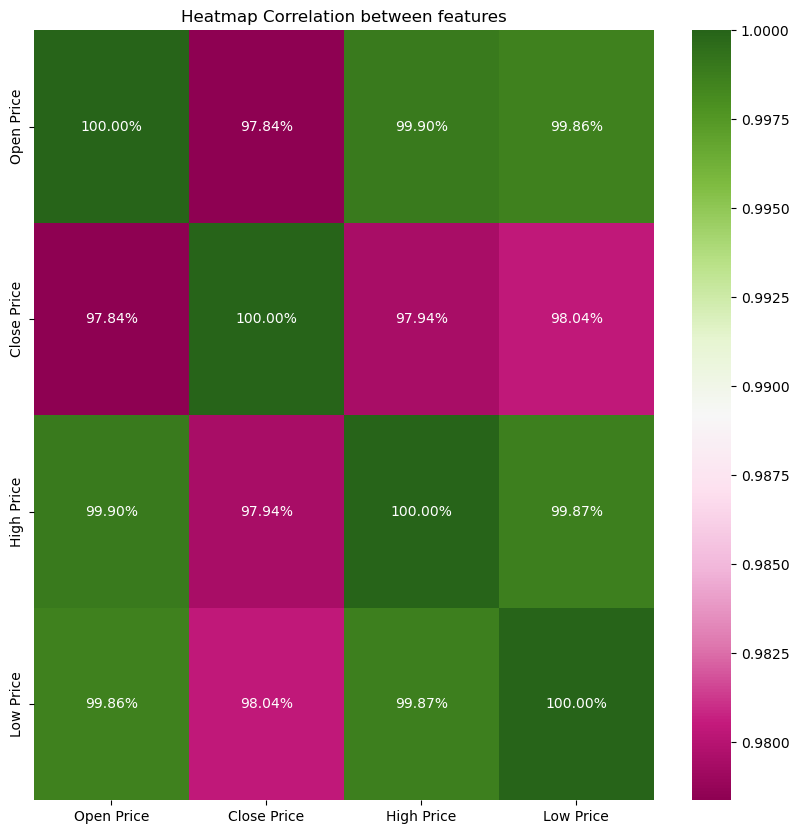

In [10]:
# Exploration code (USING INDIVIDUAL MODULE CODE by Camilo Sheldon Barreto)

# List of columns to create the heatmap
columns = [ 'Open Price', 'Close Price', 'High Price', 'Low Price']

# Initialising the HeatmapEvaluation_CSB module with selected columns
heatmap_evaluation_CSB = HeatmapEvaluation_CSB(df, 
                                               columns, 
                                               annotate_bool=True, 
                                               plot_title="Heatmap Correlation between features")

# Creates and displays the heatmap
heatmap_evaluation_CSB.create_heatmap()

**Descriptions and discoveries:**

The heatmap above shows a strong positive correlation (all values are close to 1) among the overall columns (prices), which is expected as there wouldn't be huge differences among the prices over time. From the heatmap, we can observe the following patterns:

- There is a weaker correlation between the opening and closing prices, suggesting price fluctuations throughout the day.
- There is a stronger correlation between the high and low prices, indicating minor changes in trading prices.
- The correlation between the opening price and the highest price is greater than that between the opening price and the lowest price, suggesting that there is a higher chance that prices will reach their peak earlier in the day.

## 4. Data Pre-Processing
---
The data collected needs to be pre-processed in order to generate an accurate and robust model. This process is performed by cleaning and formatting the data to remove any irrelevant features or entries. 

In [11]:
# Data manipulation 1
# The dataframe is converted to a date time object.
df.index = pd.to_datetime(df.index)

In [12]:
# Data manipulation 2 
# Get avg for each month
# The dataframe is resampled to calculate the monthly mean for all its features.
df = df[['Open Price', 'Close Price', 'High Price', 'Low Price']].resample('M').mean()
# The index is formatted to display the date in YYYY-MM format.
df.index = df.index.strftime('%Y-%m')
df.head()

Open Price  Close Price   High Price    Low Price
Date                                                       
2009-01  4295.390476  4281.838095  4350.942857  4219.961905
2009-02  4090.150000  4074.175000  4128.505000  4024.645000
2009-03  3760.003182  3760.230000  3817.270000  3701.402273
2009-04  4032.386500  4046.331000  4086.713500  3983.697500
2009-05  4386.103158  4393.780000  4434.611053  4349.103158

In the pre-processing stage, the date column is converted into a date time object and is used as the index for the dataframe. From the dataframe, the volume column is ommitted and is resampled to contain the mean of the data available for every month from 2009 until 2023 is calculated. Finally, the date index is then converted to a string in the year-month format.

## 5. In-Depth Analysis
---
At this stage of the analysis, we chose to predict a stocks closing price based on the opening price. This could help use see whether there is a correlation between the two variables.

#### Implementation

In [13]:
# Extracting the open price and close price features from the dataframe (USING INDIVIDUAL MODULE CODE by Chids Osuala)
open_price = df['Open Price']
close_price = df['Close Price']

# Used individual module code
setCreator_CO = TrainTest_CO(df, 80, "Open Price", "Close Price")
sets = setCreator_CO.create_sets()

open_train = sets["Training Sets"][0]
close_train = sets["Training Sets"][1]

open_test = sets["Testing Sets"][0]
close_test = sets["Testing Sets"][1]

train_size = setCreator_CO.getTrainSize()

# Need to reshape the data into a 2d array so that it can be normalised
open_train = open_train.reshape(-1, 1)

# Create a normalizer and adapt the normalizer to the training data
open_normalizer = layers.Normalization(input_shape=[1,])
open_normalizer.adapt(np.array(open_train))

# Defining the model
model = keras.Sequential([
    open_normalizer,
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1)
])


model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))

# Fitting the regression model to the training sets
history = model.fit(
    open_train,
    close_train,
    validation_split=0.2,
    verbose=0,
    epochs=500)

144


We get the opening and closing price columns from the dataset and split them into training sets and testing sets using one of our modules (TrainTest_CO.py). The data is then normalised so that it can be used to create a model. The model is defined with 3 layers consisting of 64, 64 and 1 neurons respectively and uses the relu activation function. We then compiles a neural network model using the mean squared error as the loss function and the Adam optimizer with a learning rate of 0.001.

#### Visualisation

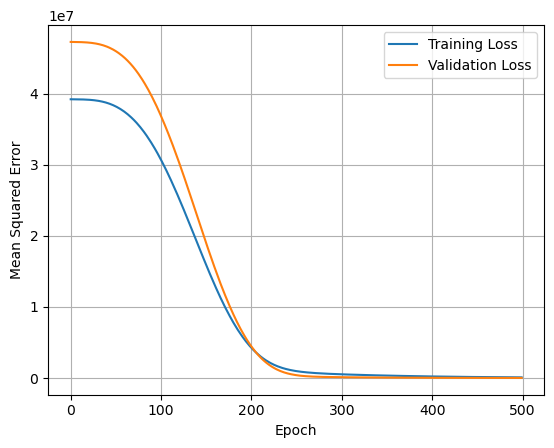

In [14]:
# Visualising mean square error, shows if model is accurate or not, closer to 0 the better
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

A plot is created to show the training loss and the validation loss, training loss shows how well the model performs on the given data and the validation loss shows how well the model can peform on unseen data. We plot the mean squared error and as we can see they both tend to 0 the more the model is ran. This shows our model is relatively accurate.

2/2 [==============================] - 0s 3ms/step


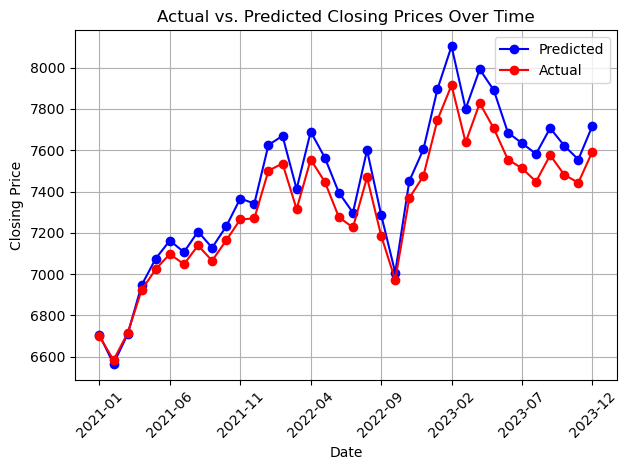

In [15]:
# Using the model to predict the closing prices
test_predictions = model.predict(open_test).flatten()

# plotting the prediction vs the actual values
plt.plot(df.index[train_size:], test_predictions, marker='o', linestyle='-', color='blue', label='Predicted')
plt.plot(df.index[train_size:], close_test, marker='o', linestyle='-', color='red', label='Actual')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs. Predicted Closing Prices Over Time')

# Rotate date labels for better readability and only plot every 5th date
plt.xticks(df.index[train_size::5], rotation=45)

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()  # adjust layout to prevent overlapping labels
plt.show()

As we can see, there is a correlation between the predicted values and the actual values but our model does over-estimate some of the values.

### Evaluation 
The previous model appears to accurately capture the overall trend of the data. However, it tends to slightly overestimate the predicted values. 
#### Improving the accuracy of the model 

In [16]:
# Adding an additional layer to the model and changing the number of neurons in each layer to 128, 128, 64 and 1 respectively.
model = keras.Sequential([
    open_normalizer,
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1)
])

# Compiling the model
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))

# Fitting the regression model to the training sets
predictions = model.fit(open_train, close_train, validation_split=0.2, verbose=0, epochs=500)

The model is defined with 4 layers consisting of 128, 128, 64 and 1 neurons respectively and uses the relu activation function. We then compiles a neural network model using the mean squared error as the loss function and the Adam optimizer with a learning rate of 0.001. Increasing the number of layers and neurons should result in a much more accurate model.

2/2 [==============================] - 0s 1ms/step


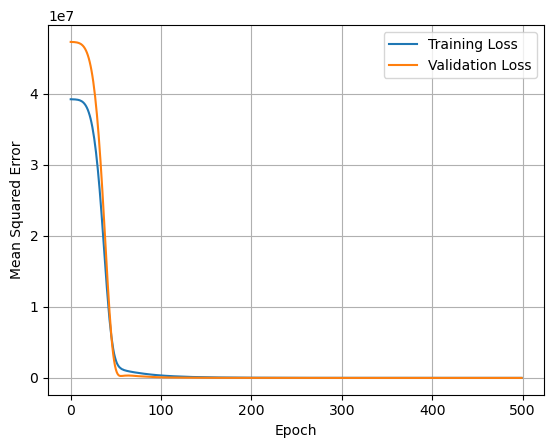

In [17]:
# visualising mean square error, shows if model is accurate or not, closer to 0 the better
plt.plot(predictions.history['loss'], label='Training Loss')
plt.plot(predictions.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
test_predictions = model.predict(open_test).flatten()

A plot is created to show the training loss and the validation loss, training loss shows how well the model performs on the given data and the validation loss shows how well the model can peform on unseen data. We plot the mean squared error and as we can see they both tend to 0 the more the model is ran. This model clearly shows to be performing better with fewer epoch runs.

2/2 [==============================] - 0s 3ms/step


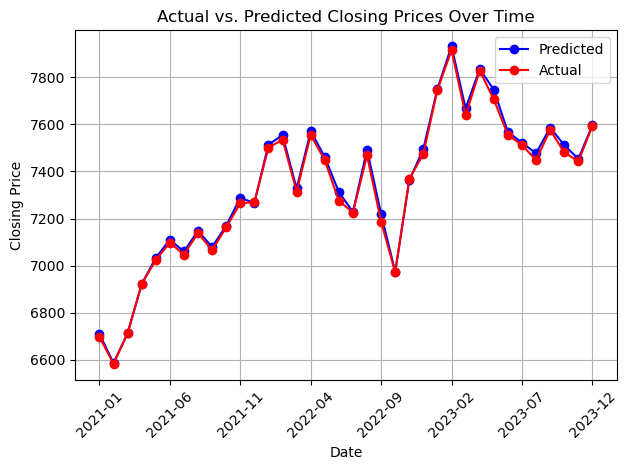

In [18]:
# Predicting closing prices using the new model
test_predictions = model.predict(open_test).flatten()

# plotting the prediction vs the actual values
plt.plot(df.index[train_size:], test_predictions, marker='o', linestyle='-', color='blue', label='Predicted')
plt.plot(df.index[train_size:], close_test, marker='o', linestyle='-', color='red', label='Actual')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs. Predicted Closing Prices Over Time')

# Rotate date labels for better readability and only plot every 5th date
plt.xticks(df.index[train_size::5], rotation=45)

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()  # adjust layout to prevent overlapping labels
plt.show()

The second model with additional layers and neurons performs significantly better than the previous model with fewer layers and neurons as the actual and predicted values are quite close to each other. 

## 6. Communicate Results (Summary)
---

# The problem

Studying trends of FTSE 100 Index from 2009 - 2023.

We will be analyzing the effects that certain factors and world events have on a stock prices of the FTSE 100 Index.

## Results

The dataframe contained 3777 columns and 5 rows. The dataframe did not contain any null values. 

In the exploratory data analysis (EDA) section, the line plot and the box plot show an overall positive correlation in the stock prices over the past 15 years. 

During the in-depth analysis stage, we created a sequential model using tensor flow (our new python module). The first model was structured with three layers, each with 64 neurons in the first two layers, and a single neuron in the final layer. This model performed well. However, it over estimated the prediction of the closing prices. Later, a second improved model was created with 4 layers consisting of 128 neurons in the first 2 layers, followed by 64 and 1 layer in the subsequent layers. This improved model performed better than the previous model and predicted the closing prices to a higher accuracy. 

## References
---
https://medium.com/@uzairadamjee/exploratory-data-analysis-on-stock-market-data-5d99fbdf3b04#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20is,and%20relationships%20in%20the%20data.

https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/


## Group Reflection
---
In the first week following group formation, we had an in-person meeting to get to know one another and choose which dataframe to use. We chose not to choose a group leader and assumed equal responsibilites among group members. We decided everyone would suggest 3 datasets and a new python package we could use. We set up a whatsapp group to stay updated throughout the project and a shared onedrive folder to upload files, to keep our files organised we decided to set up sub folders for specific tasks. At the end of the first week, everyone voted to use the FTSE 100 Index to analyze the effects that certain factors and world events have on its stocks prices. Following our initial meeting, we met once every week in person on campus to discuss our progress and to make other project decisions.   

The following week during our in person meeting, we started the project but found it challenging to share the progress of the notebook among everyone as jupyter notebook did not support real time collaboration. We tried using alternative software such as google collab and vs code live share but decided to go back to using Jupyter notebook. We choose to let one member keep and update the final template of the notebook and submitted html version of any changes to the shared folder to be added to the final template. Every time the final notebook had major changes it was uploaded back to onedrive so that other members had access to the latest version of the notebook. We all decided to choose the section to which we would add our individual module code so that it can be used to aid the final project and completed it by the end of the week to be incorporated into the notebook. Fabio, Tina and Camilo chose to implement their module code into the exploratory data analysis section and Chids chose to implement his module code into the in-depth analysis section.  

Everyone attented the meetings and actively participated in the decision-making process and the construction of the final template. After completing the notebook we decided to make a presentation for the video submission. Together, we created a powerpoint presentation that clearly summarises the entire experiment and its conclusions. Chids and Fabio volunteered to present the powerpoint for the video. We recorded the powerpoint on campus after completing it.  

# Camilo Sheldon Barreto (31008527) - CSB Reflection
---
For the creation of individual module, I decided to create a correlation heatmap between the features of the dataframe using the seaborn python module. The module contains a class called HeatmapEvaluation_CSB. I have created the constructor to allow customisation of the heatmap. When initialising an object using my module, the user can:
1. Set their desired figure size for the plot using the figsize atttribute.
2. Specify the exact features to be used to plot using the columns attribute.
3. Choose to annotate the blocks of the heatmap as a percentage using the annotate_bool attribute (boolean, set to false as default)
4. Choose their preferred color map (default set to PiYG)
5. Choose the title to be displayed for the heatmap (default set to "Default Title")

Using the specified settings, the create_heatmap function can be used to create and display the heatmap.
My module can be used to perform exploratory data analysis (EDA) to look for correlations between features of the dataframe. I decided to leave the volume feature out of the correlation heatmap as it was negatively correlated with the other features which is expected as the volume of the stocks traded wont highly rely on other features such as opening or closing prices. Keeping the volume feature in the heatmap also made it harder to view the correlation between other features as the annotated value on the blocks of the heatmap was rounded to 1, therfore I chose to display the correlation as a percentage to 2 decimal places. There wasn't a huge differnce in the colours of the heatmap when I used the coolwarm colormap and therefore I decided to use a diverging color map (PiYG) to easily view the difference in the colours for each block of the heatmap. Whilst creating the module, I gained further experience in creating a general class that can be used in most situations. I found it challenging to create docstrings with the perfect layout that would be both informative and concise.

# Chids Osuala (31012446) - CO Reflection
---
My efforts were mainly focused around the in-depth analysis of the stock market data. When developing my module, I chose to take an object oriented approach so that it is easy to modify and update certain parts of my code. My module is responsible for splitting a dataset into testing and training sets. In order to create a machine learning model to predict something, you need training sets, to train the model on and a test set to test the model on. When developing my module, I made sure that the user is able to specify which columns of a dataset you need to create training and testing sets for and the percentage of the columns to be used for training sets. During development, the main issue I encountered was figuring out how I could store training sets and testing sets so that it could be returned by a method in my class. After some research, I settled on using a dictionary to store the training sets and testing sets. If I was to redo my module, one thing that I may have done differently is to be able to automate the process of choosing how much of the columns in the dataframe should be used for training and how much should be used for testing. It would take into account the length of the columns in the dataframe and the type of machine learning model being used and split the data accordingly Currently, the user has to pass in a percentage but if the percentage is not right then the machine learning model may not perform correctly. Making my module automate this may make the overall program more robust.

# Fabio Rodrigues (31016067) - FR Reflection
---
In this project, I learned how to conduct an Exploratory Data Analysis (EDA) on various databases, with an emphasis on selecting appropriate databases for investigation. My contribution focused on identifying a relevant problem and choosing a suitable database for exploration. As part of my module, I concentrated on EDA techniques, which involved a detailed examination of the database and employing visualisation tools like line graphs and box plots to uncover trends within the data. To enhance the design of the line chart, I developed three specific functions: one for plotting the high prices, another for plotting the low prices, and a third to present the line chart in a clear and comprehensible manner. Utilising both box and line charts proved instrumental in providing a visual interpretation of the data, facilitating the identification of patterns and trends. This approach not only made the analysis more intuitive but also allowed for a more accessible understanding of the data's underlying dynamics. 

# Tina Azad Arjastan (31002744) - TAA Reflection
---
Using the Pandas and Matplotlib libraries, the provided Python script demonstrates a thorough method for visualising financial data. First, the required modules are imported, such as Matplotlib for plotting and Pandas for data manipulation. Next, the code builds a DataFrame from the provided data, using the 'Date' column as the temporal reference index. The next step is to launch a 10x6-inch plotting canvas, which prepares the screen for the next visualisation. The script employs the bar plot function in Matplotlib to effectively compare open and close prices over a given time. It makes use of distinct colours, using salmon for close prices and sky blue for open prices, to improve clarity and differentiation. The colour scheme's transparency (alpha value of 0.7) guarantees readability while facilitating a clearer understanding of overlapping data points. Moreover, crucial context is provided for interpretation by the plot title ('Open Price vs. Close Price') and the axis labels ('Date' for the x- and 'Price' for the y-axes). A deeper comprehension of the underlying trends and patterns within the financial dataset is made possible by the histogram, which shows the variations in prices over time. Overall, the script shows a strong approach to data visualisation, facilitating perceptive examination and well-informed financial market decision-making.